In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2


In [ ]:
DATADIR ='/content/drive/MyDrive/flowers'
CATAGORIES = ['daisy' , 'dandelion' , 'rose' , 'sunflower' , 'tulip'] 



In [ ]:
training_data = []
IMAGE_SIZE = 150
def create_training_data():
  for category in CATAGORIES:
    path  = os.path.join(DATADIR , category) # path to daisy , dandeltion , rose , sunflower , tulip
    class_num = CATAGORIES.index(category)

    for img in  os.listdir(path):
      try :
        img_array = cv2.imread(os.path.join(path , img) , cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array , (IMAGE_SIZE , IMAGE_SIZE))
        training_data.append([new_array , class_num])
      except Exception as e:
        pass
create_training_data()

In [ ]:
print(training_data[0])

[array([[129, 124, 114, ..., 170, 166, 149],
       [124, 108,  96, ..., 135, 151, 136],
       [109,  96,  82, ..., 129, 125, 124],
       ...,
       [ 20,  20,  19, ...,  39,  36,  38],
       [ 19,  18,  19, ...,  38,  40,  40],
       [ 17,  16,  19, ...,  38,  39,  37]], dtype=uint8), 0]


In [ ]:
import random 

random.shuffle(training_data)

In [ ]:
for sample in training_data[0:10]:
  print(sample[1])

2
2
4
4
1
0
2
0
4
3


In [ ]:
input = []
targets = []

In [ ]:
for features , labels in training_data:
  input.append(features)
  targets.append(labels)

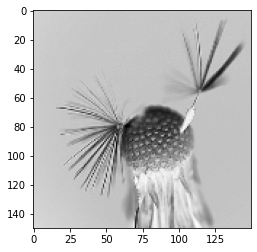

In [ ]:
digit = input[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
input = np.array(input)
input.shape

(4323, 150, 150)

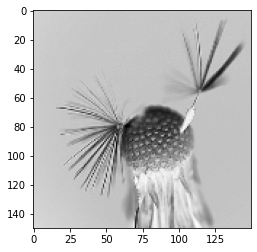

In [ ]:
digit = input[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
input = input.reshape(4323, 150*150)

In [ ]:
input[0]

array([ 58,  63,  74, ...,  58, 173, 119], dtype=uint8)

In [ ]:
input.shape

(4323, 22500)

In [ ]:
input = input.astype('float32')/255

In [ ]:
input[0]

array([0.22745098, 0.24705882, 0.2901961 , ..., 0.22745098, 0.6784314 ,
       0.46666667], dtype=float32)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
targets = le.fit_transform(targets)

In [ ]:
print(targets)

[2 2 4 ... 3 1 0]


In [ ]:
from keras.utils import to_categorical

targets=to_categorical(targets,5)

In [ ]:
targets

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
train_data,test_data,train_targets,test_targets=train_test_split(input,targets,test_size=0.25,random_state=42)

In [ ]:
train_data

array([[0.00784314, 0.00784314, 0.00784314, ..., 0.        , 0.        ,
        0.        ],
       [0.84313726, 0.24705882, 0.16470589, ..., 0.38431373, 0.49803922,
        0.6313726 ],
       [0.22745098, 0.49803922, 0.6627451 , ..., 0.22352941, 0.21960784,
        0.10588235],
       ...,
       [0.30588236, 0.32156864, 0.33333334, ..., 0.45490196, 0.44705883,
        0.43529412],
       [0.7176471 , 0.7254902 , 0.7411765 , ..., 0.5137255 , 0.28627452,
        0.05882353],
       [0.16470589, 0.16470589, 0.15686275, ..., 0.09803922, 0.16862746,
        0.13725491]], dtype=float32)

In [ ]:
test_data.shape

(1081, 22500)

In [ ]:
train_targets[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_targets

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(22500,)))
network.add(layers.Dense(5, activation='softmax'))

In [ ]:

network.compile( optimizer='rmsprop',
loss='categorical_crossentropy', 
metrics=['accuracy'])

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               11520512  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 11,523,077
Trainable params: 11,523,077
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = network.fit(train_data,train_targets, epochs=50,batch_size= 32)

Epoch 1/50
102/102 [==============================] - 4s 13ms/step - loss: 31.0379 - accuracy: 0.2209
Epoch 2/50
102/102 [==============================] - 1s 12ms/step - loss: 7.4980 - accuracy: 0.2532
Epoch 3/50
102/102 [==============================] - 1s 12ms/step - loss: 5.5777 - accuracy: 0.2345
Epoch 4/50
102/102 [==============================] - 1s 12ms/step - loss: 3.8349 - accuracy: 0.2400
Epoch 5/50
102/102 [==============================] - 1s 12ms/step - loss: 3.3516 - accuracy: 0.2701
Epoch 6/50
102/102 [==============================] - 1s 12ms/step - loss: 2.5755 - accuracy: 0.2786
Epoch 7/50
102/102 [==============================] - 1s 12ms/step - loss: 2.4180 - accuracy: 0.2579
Epoch 8/50
102/102 [==============================] - 1s 12ms/step - loss: 1.8324 - accuracy: 0.2960
Epoch 9/50
102/102 [==============================] - 1s 12ms/step - loss: 1.7495 - accuracy: 0.2954
Epoch 10/50
102/102 [==============================] - 1s 12ms/step - loss: 1.6346 - accur